# 머신러닝

## 학생 결석 여부 확인 데이터
/kaggle/input/adp-p8/problem1.csv


성별(sex) 바이너리 : 'F' - 여성 또는 'M' - 남성     
나이(age) 숫자: 15 - 22     
부모님동거여부 (Pstatus) 바이너리: T: 동거 또는 'A': 별거       
엄마학력(Medu) 숫자 : 0 : 없음, 1 : 초등 교육, 2 : 5-9학년, 3 - 중등 교육 또는 4 - 고등 교육    
아빠학력(Fedu) 숫자 : 0 : 없음, 1 : 초등 교육, 2 : 5-9학년, 3 - 중등 교육 또는 4 - 고등 교육   
주보호자(guardian) 명목형 : '어머니', '아버지' 또는 '기타'     
등하교시간(traveltime) 숫자 : 1 : 15분이하, 2 : 15 ~ 30분, 3 : 30분 ~ 1시간, 4 : 1시간 이상       
학습시간(studytime) 숫자 : 1 : 2시간이하, 2 : 2~5시간, 3 : 5~10시간, 4 : 10시간이상    
학고횟수(failures)  숫자 : 1, 2, 3 else 4     
자유시간(freetime) 숫자 : 1(매우 낮음), 2, 3, 4, 5(매우 높음)   
가족관계(famrel) 숫자 : 1(매우 나쁨), 2, 3, 4, 5(우수)    

### 1-1 데이터 EDA 및 시각화

In [186]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('/kaggle/input/adp-p8/problem1.csv')

df.head()

,sex,age,Pstatus,Fedu,Medu,guardian,studytime,traveltime,failures,famrel,freetime,absences
0,F,18.0,A,4,4,mother,2,2.0,0,4,3.0,6
1,F,17.0,T,1,1,father,2,1.0,0,5,3.0,4
2,F,15.0,T,1,1,mother,2,1.0,3,4,3.0,10
3,F,15.0,T,2,4,mother,3,1.0,0,3,2.0,2
4,F,NaN,T,3,3,father,2,1.0,0,4,3.0,4


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         395 non-null    object 
 1   age         392 non-null    float64
 2   Pstatus     395 non-null    object 
 3   Fedu        395 non-null    int64  
 4   Medu        395 non-null    int64  
 5   guardian    395 non-null    object 
 6   studytime   395 non-null    int64  
 7   traveltime  392 non-null    float64
 8   failures    395 non-null    int64  
 9   famrel      395 non-null    int64  
 10  freetime    390 non-null    float64
 11  absences    395 non-null    int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 37.2+ KB


age, traveltime, freetime에 결측치 있는 것 확인 완료

In [188]:
df.describe()

,age,Fedu,Medu,studytime,traveltime,failures,famrel,freetime,absences
count,392.000000,395.000000,395.000000,395.000000,392.000000,395.000000,395.000000,390.000000,395.000000
mean,16.698980,2.521519,2.749367,2.035443,1.446429,0.334177,3.944304,3.233333,5.708861
std,1.279865,1.088201,1.094735,0.839240,0.695022,0.743651,0.896659,1.000985,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,0.000000
50%,17.000000,2.000000,3.000000,2.000000,1.000000,0.000000,4.000000,3.000000,4.000000
75%,18.000000,3.000000,4.000000,2.000000,2.000000,0.000000,5.000000,4.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,75.000000


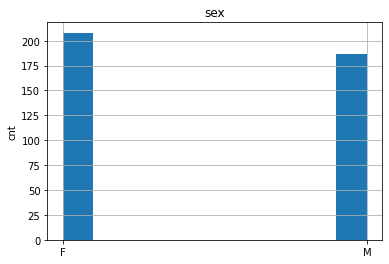

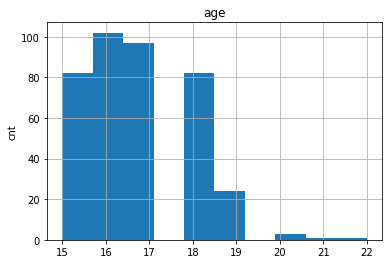

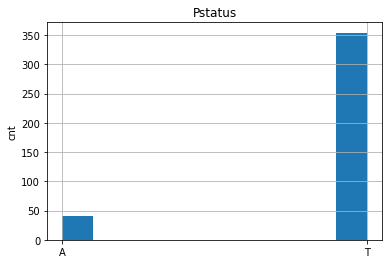

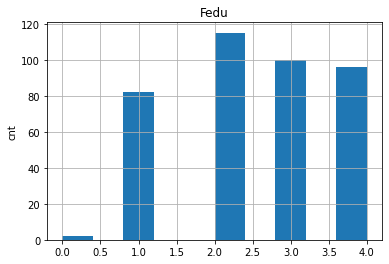

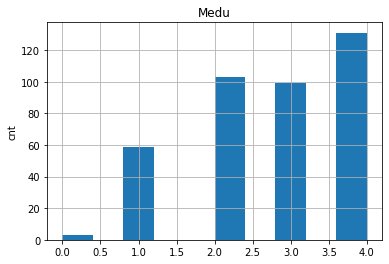

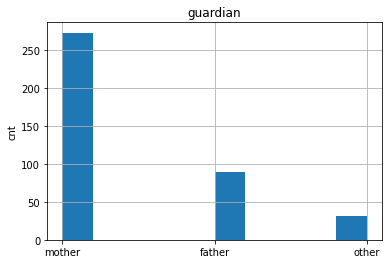

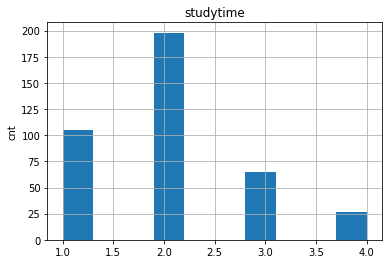

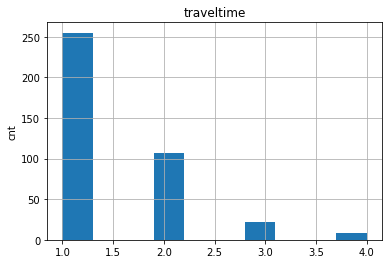

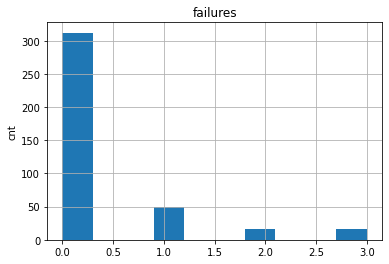

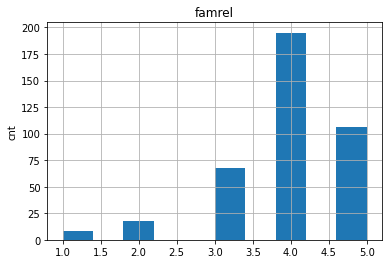

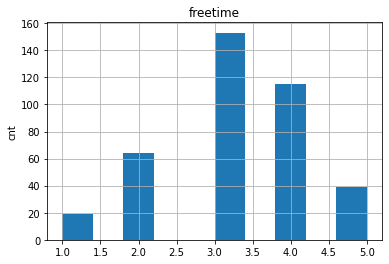

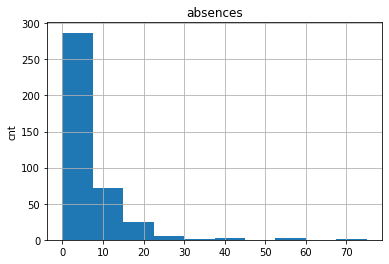

In [189]:
# 모두 연속형 변수가 아니므로, 히스토그램 하나씩 그리기
for col in df.columns:
    df[col].hist()
    plt.title(col)
    plt.ylabel('cnt')
    plt.show()

### 1-2 결측치 처리 및 변화 시각화, 추가 전처리가 필요하다면 이유와 기대효과를 설명하라

In [190]:
# 결측치 확인
df.isnull().sum()

sex           0
age           3
Pstatus       0
Fedu          0
Medu          0
guardian      0
studytime     0
traveltime    3
failures      0
famrel        0
freetime      5
absences      0
dtype: int64

In [191]:
# 결측치를 최빈값으로 대체
for col in ['age', 'traveltime', 'freetime']:
    df[col].fillna(df[col].mode()[0], inplace=True)
    
df.isnull().sum()

sex           0
age           0
Pstatus       0
Fedu          0
Medu          0
guardian      0
studytime     0
traveltime    0
failures      0
famrel        0
freetime      0
absences      0
dtype: int64

혹시나 해서 이상치가 있을까 싶어 상자그림으로 확인

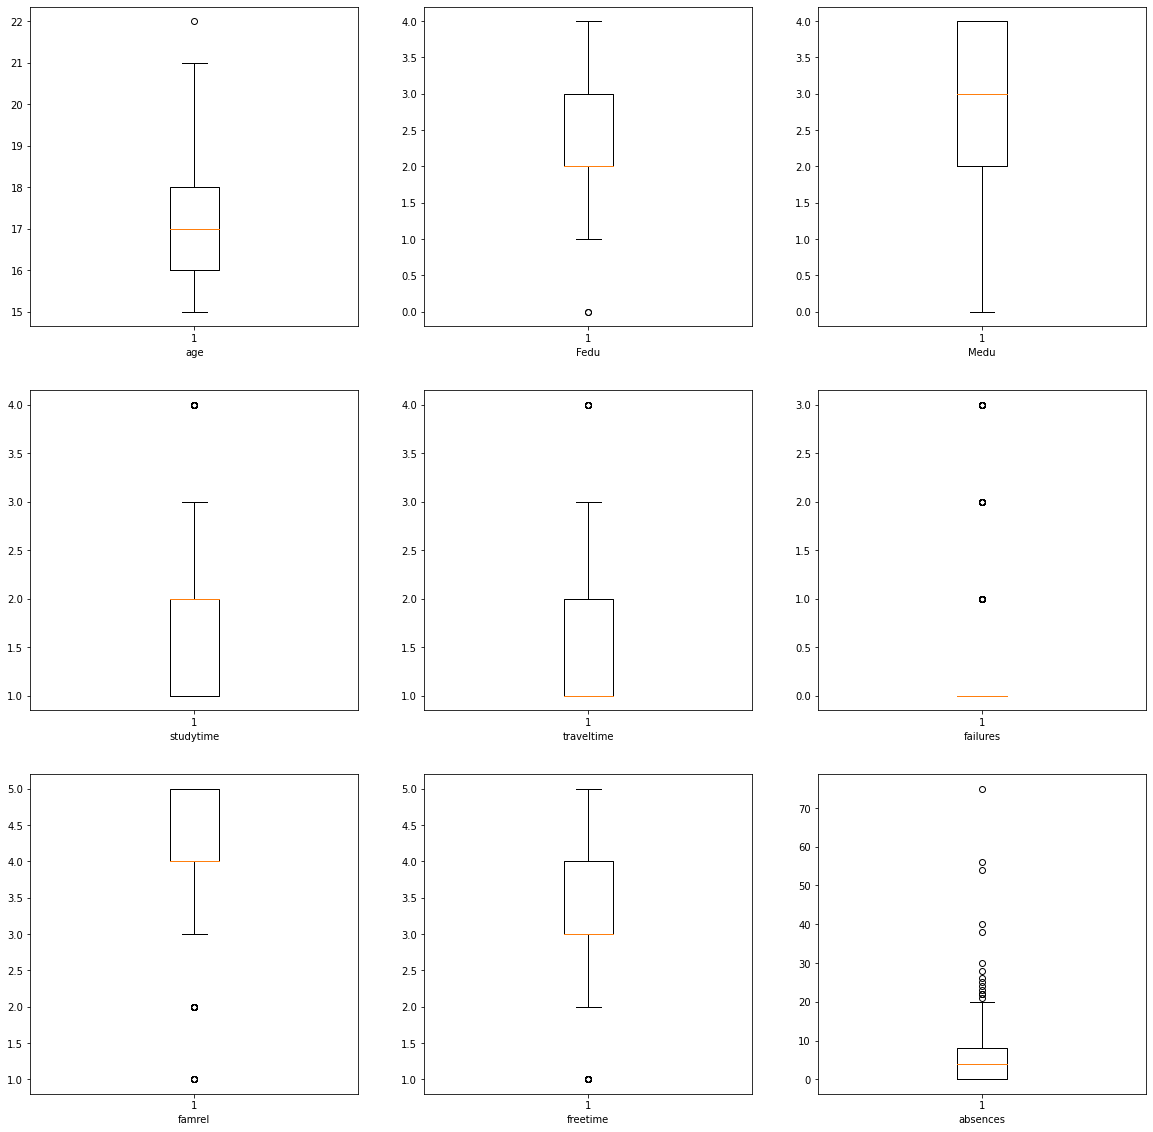

In [192]:
plt.figure(figsize = (20, 20))
plt.subplot(3, 3, 1)
plt.boxplot(df['age'])
plt.xlabel('age')

plt.subplot(3, 3, 2)
plt.boxplot(df['Fedu'])
plt.xlabel('Fedu')

plt.subplot(3, 3, 3)
plt.boxplot(df['Medu'])
plt.xlabel('Medu')

plt.subplot(3, 3, 4)
plt.boxplot(df['studytime'])
plt.xlabel('studytime')

plt.subplot(3, 3, 5)
plt.boxplot(df['traveltime'])
plt.xlabel('traveltime')

plt.subplot(3, 3, 6)
plt.boxplot(df['failures'])
plt.xlabel('failures')

plt.subplot(3, 3, 7)
plt.boxplot(df['famrel'])
plt.xlabel('famrel')

plt.subplot(3, 3, 8)
plt.boxplot(df['freetime'])
plt.xlabel('freetime')

plt.subplot(3, 3, 9)
plt.boxplot(df['absences'])
plt.xlabel('absences')

plt.show()

상자그림을 봐도 이상치가 있다고는 판단할 수 없을 것 같다.

이제 값이 문자인 변수들을 원핫인코딩해주자.

In [193]:
df = pd.get_dummies(df, columns = ['sex', 'Pstatus', 'guardian'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              395 non-null    float64
 1   Fedu             395 non-null    int64  
 2   Medu             395 non-null    int64  
 3   studytime        395 non-null    int64  
 4   traveltime       395 non-null    float64
 5   failures         395 non-null    int64  
 6   famrel           395 non-null    int64  
 7   freetime         395 non-null    float64
 8   absences         395 non-null    int64  
 9   sex_F            395 non-null    uint8  
 10  sex_M            395 non-null    uint8  
 11  Pstatus_A        395 non-null    uint8  
 12  Pstatus_T        395 non-null    uint8  
 13  guardian_father  395 non-null    uint8  
 14  guardian_mother  395 non-null    uint8  
 15  guardian_other   395 non-null    uint8  
dtypes: float64(3), int64(6), uint8(7)
memory usage: 30.6 KB


그리고 결석 여부를 예측하는 것이므로 결석이 0 초과인 경우 1로 바꿔준다.

In [194]:
df[df['absences'] > 0] = 1

이제 상관계수를 통해 다중공선성이 의심되는 변수들이 있는지 확인한다.

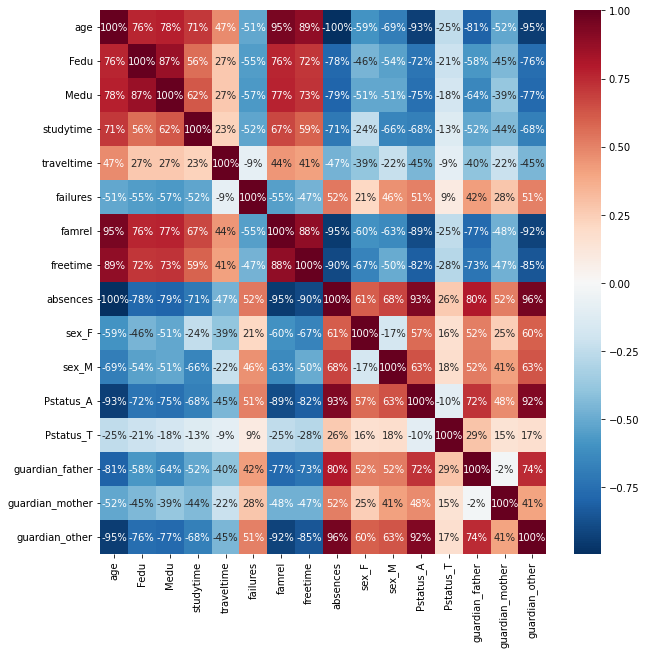

In [195]:
df_corr = df.corr(method = 'pearson')
plt.figure(figsize = (10, 10))
sns.heatmap(df_corr, cmap = 'RdBu_r', annot = True, fmt = '.0%')
plt.show()

다중공선성이 있는 변수들이 많아보여, 주성분 분석을 통해 차원을 축소하는 것이 필요하다.

### 1-3 결석일수 예측모델을 2개 제시하고 선택한 근거 설명

결석일수 예측모델로 의사결정나무와 랜덤포레스트를 제시한다.

In [196]:
y = df.pop('absences')
x = df

In [197]:
# train_test_split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 731)

scaling은 할 수 있는 것이 없을 것 같아 생략한다.

### 1-4 선정한 모델 2가지 생성 및 모델의 평가 기준을 선정하고 선정 이유 설명

평가 기준은 정확도(accuracy)로 한다.

결석이 많을 것으로 예측하는 학생에게 조치를 취하기 위해 예측한 것 중 얼마나 맞혔는지가 중요하다고 생각한다.

In [199]:
# 1. 의사결정나무(Decision Tree)
# GridSerchCV를 통해 최적 하이퍼 파라미터 찾기

import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state = 731)

param_clf = {"max_depth" : [3, 5, 10, 20, 50],
           "criterion" : ['gini', 'entropy']}

gscv_clf = GridSearchCV(estimator = clf, param_grid = param_clf, scoring = 'accuracy', cv = 3)

gscv_clf.fit(x_train, y_train)

print('best params : ', gscv_clf.best_params_)
print('accuracy : {:.4f}'.format(gscv_clf.best_score_))

best params :  {'criterion': 'gini', 'max_depth': 3}
accuracy : 1.0000


In [202]:
# 시간까지 해서 성능 측정
import time

clf_best = DecisionTreeClassifier(random_state = 731, criterion = 'gini', max_depth = 3)

clf_start = time.time()
clf_best.fit(x_train, y_train)
clf_end = time.time()

print("학습 시간 : ", clf_end - clf_start, "초")

# 정확도
clf_pred = clf_best.predict(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

test_acc = accuracy_score(y_test, clf_pred)
test_prc = precision_score(y_test, clf_pred)
test_rcll = recall_score(y_test, clf_pred)
test_f1 = f1_score(y_test, clf_pred)

print('정확도\t{}%'.format(round(test_acc*100), 2))
print('정밀도\t{}%'.format(round(test_prc*100), 2))
print('재현율\t{}%'.format(round(test_rcll*100), 2))
print('F1\t{}%'.format(round(test_f1*100), 2))

학습 시간 :  0.004886150360107422 초
정확도	99%
정밀도	99%
재현율	100%
F1	99%


In [200]:
# 2. RF(랜덤 포레스트)
# GridSearchCV를 통한 최적의 하이퍼 파라미터 찾기

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=731)

param_rf = {"n_estimators" : [10, 50, 100, 200, 500],
           "min_samples_split" : [3, 5, 7, 9],
           "criterion" : ['gini', 'entropy']}

gscv_rf = GridSearchCV(estimator = rf, param_grid = param_rf, scoring = 'accuracy', cv = 3)

gscv_rf.fit(x_train, y_train)

print('best params : ', gscv_rf.best_params_)
print('accuracy : {:.4f}'.format(gscv_clf.best_score_))

best params :  {'criterion': 'gini', 'min_samples_split': 3, 'n_estimators': 10}
accuracy : 1.0000


In [211]:
# RF 성능평가

# 시간
rf_best = RandomForestClassifier(random_state = 731, criterion = 'gini', n_estimators = 10, min_samples_split = 3)

import time

rf_start_time = time.time()
rf_best.fit(x_train, y_train)
rf_end_time = time.time()
print("학습 시간 : ", rf_end_time - rf_start_time, "초")

# 정확도
rf_pred = rf_best.predict(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

test_acc = accuracy_score(y_test, rf_pred)
test_prc = precision_score(y_test, rf_pred)
test_rcll = recall_score(y_test, rf_pred)
test_f1 = f1_score(y_test, rf_pred)

print('정확도\t{}%'.format(round(test_acc*100), 2))
print('정밀도\t{}%'.format(round(test_prc*100), 2))
print('재현율\t{}%'.format(round(test_rcll*100), 2))
print('F1\t{}%'.format(round(test_f1*100), 2))

학습 시간 :  0.02606034278869629 초
정확도	100%
정밀도	100%
재현율	100%
F1	100%


딱봐도 여부를 예측하는 모델은 오버피팅 된듯

주성분 분석을 통해 필요한 애들만 남겨야 겠다

In [204]:
# 주성분 분석을 통한 차원 축소 진행

# 주성분 추출
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
pca_fit = pca.fit(x)

print('고윳값 : ', pca.singular_values_)
print('분산 설명력 : ', pca.explained_variance_ratio_)

고윳값 :  [148.41466563  16.27317609  11.84501579   9.84465027   8.32627214
   7.64829627]
분산 설명력 :  [0.96357941 0.01158453 0.00613769 0.00423969 0.00303274 0.00255896]


엥 1개만 남겨도 된다니 하나만 남겨보겠다

In [206]:
pca = PCA(n_components = 1)
principal_x = pd.DataFrame(pca.fit_transform(x), columns = ['pc1'])
principal_x.describe()

,pc1
count,3.950000e+02
mean,1.798842e-16
std,7.477023e+00
min,-4.768431e+00
25%,-4.768431e+00
50%,-4.768431e+00
75%,1.030835e+01
max,1.508550e+01


In [207]:
# train_test_split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(principal_x, y, test_size = 0.3, random_state = 731)

In [208]:
# 1. 의사결정나무(Decision Tree)
# GridSerchCV를 통해 최적 하이퍼 파라미터 찾기

import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state = 731)

param_clf = {"max_depth" : [3, 5, 10, 20, 50],
           "criterion" : ['gini', 'entropy']}

gscv_clf = GridSearchCV(estimator = clf, param_grid = param_clf, scoring = 'accuracy', cv = 3)

gscv_clf.fit(x_train, y_train)

print('best params : ', gscv_clf.best_params_)
print('accuracy : {:.4f}'.format(gscv_clf.best_score_))

best params :  {'criterion': 'gini', 'max_depth': 3}
accuracy : 1.0000


In [209]:
# 시간까지 해서 성능 측정
import time

clf_best = DecisionTreeClassifier(random_state = 731, criterion = 'gini', max_depth = 3)

clf_start = time.time()
clf_best.fit(x_train, y_train)
clf_end = time.time()

print("학습 시간 : ", clf_end - clf_start, "초")

# 정확도
clf_pred = clf_best.predict(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

test_acc = accuracy_score(y_test, clf_pred)
test_prc = precision_score(y_test, clf_pred)
test_rcll = recall_score(y_test, clf_pred)
test_f1 = f1_score(y_test, clf_pred)

print('정확도\t{}%'.format(round(test_acc*100), 2))
print('정밀도\t{}%'.format(round(test_prc*100), 2))
print('재현율\t{}%'.format(round(test_rcll*100), 2))
print('F1\t{}%'.format(round(test_f1*100), 2))

학습 시간 :  0.0033140182495117188 초
정확도	100%
정밀도	100%
재현율	100%
F1	100%


In [210]:
# 2. RF(랜덤 포레스트)
# GridSearchCV를 통한 최적의 하이퍼 파라미터 찾기

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=731)

param_rf = {"n_estimators" : [10, 50, 100, 200, 500],
           "min_samples_split" : [3, 5, 7, 9],
           "criterion" : ['gini', 'entropy']}

gscv_rf = GridSearchCV(estimator = rf, param_grid = param_rf, scoring = 'accuracy', cv = 3)

gscv_rf.fit(x_train, y_train)

print('best params : ', gscv_rf.best_params_)
print('accuracy : {:.4f}'.format(gscv_clf.best_score_))

best params :  {'criterion': 'gini', 'min_samples_split': 3, 'n_estimators': 10}
accuracy : 1.0000


In [212]:
# RF 성능평가

# 시간
rf_best = RandomForestClassifier(random_state = 731, criterion = 'gini', n_estimators = 10, min_samples_split = 3)

import time

rf_start_time = time.time()
rf_best.fit(x_train, y_train)
rf_end_time = time.time()
print("학습 시간 : ", rf_end_time - rf_start_time, "초")

# 정확도
rf_pred = rf_best.predict(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

test_acc = accuracy_score(y_test, rf_pred)
test_prc = precision_score(y_test, rf_pred)
test_rcll = recall_score(y_test, rf_pred)
test_f1 = f1_score(y_test, rf_pred)

print('정확도\t{}%'.format(round(test_acc*100), 2))
print('정밀도\t{}%'.format(round(test_prc*100), 2))
print('재현율\t{}%'.format(round(test_rcll*100), 2))
print('F1\t{}%'.format(round(test_f1*100), 2))

학습 시간 :  0.027548789978027344 초
정확도	100%
정밀도	100%
재현율	100%
F1	100%


### 1-5 모델이 다양한 일상 상황에서도 잘 동작한다는 것을 설명하고 시각화 하라

## 1-6 모델 최적화 방안에 대해 구체적으로 설명하라

# 통계분석

# 2
## 광고횟수와 광고비에 따른 매출액의 데이터이다. 
/kaggle/input/adp-p8/problem2.csv

### 2-1 광고비 변수를 가변수 처리후 다중회귀를 수행하여 회귀계수가 유의한지 검정

### 2-2 회귀식이 유의한지 판단

# 3
## A생산라인의 제품 평균은 5.7mm이고 표준편차는 0.03, B생산라인의 제품 평균은 5.6mm이고 표준편차는 0.04라면 5%유의수준으로 두 제품의 평균이 차이가 있는지 여부를 검정하기 Z(0.05) = 1.65

### 3-1 귀무가설과 대립가설을 세워라 

* 귀무가설 : 두 제품의 평균은 차이가 있다고 말할 수 없다.
* 대립가설 : 두 제품의 평균은 차이가 있다고 말할 수 있다.

### 3-2 두 평균이 차이가 있는지 검정하라

각각 몇개인지 몰라 그냥 한다.

In [173]:
import numpy as np

m_a = 5.7
m_b = 5.6
s_a = 0.03
s_b = 0.04
s_p_squared = (s_a**2 + s_b**2)

z = 1.65

t = (m_a - m_b)/np.sqrt(s_p_squared)

print(t)

2.0000000000000107


t 검정통계량이 z(0.05)=1.65보다 크므로 유의수준 0.05 하에서 귀무가설을 기각하고 대립가설을 채택한다.

즉, A, B 생산라인의 제품 평균은 차이가 있다고 말할 수 있다.

# 4
## 바이러스 감염 분류표를 보고 베이지안 분류 방법을 사용해 양성으로 예측된 사람이 실제로 양성일 확률을 구하라
![image](https://github.com/Datamanim/datarepo/blob/main/adp/24/problem4.png?raw=true)

In [174]:
print(370/(370+10))

0.9736842105263158


# 5 주어진 데이터에서 신뢰구간을 구하려한다
정규분포에서 표폰을 추출함[Z(0.05) = -1.65 , Z(0.025) = -1.96, T(0.05, 8) = 1.860 , T0.025(0.025, 8) = 2.306]     
데이터(9개) : [3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3 4.4, 4.7]

### 5-1 모분산을 모르는 경우 주어진 데이터의 95% 신뢰구간을 구하라

In [183]:
import pandas as pd
import numpy as np
data = [3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3, 4.4, 4.7]

x = pd.Series(data)

mean = x.mean()
std = np.std(x)

print('mean : ', mean)
print('std : ', std)

mean :  3.888888888888889
std :  0.5043024763515652


In [184]:
lower_bound = mean - 1.96 * (std/3)
upper_bound = mean + 1.96 * (std/3)

print(lower_bound, upper_bound)

3.559411271005866 4.218366506771911


### sigma = 0.04인걸 알고있을때의 95% 신뢰구간을 구하라 

In [185]:
lower_bound_knowing_sigma = mean - 1.96 * 0.04
upper_bound_knowing_sigma = mean + 1.96 * 0.04

print(lower_bound_knowing_sigma, upper_bound_knowing_sigma)

3.810488888888889 3.9672888888888886
